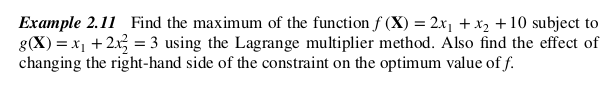

In [1]:
import sympy as sp

# Define the variables
x1, x2, z, λ = sp.symbols('x1 x2 z λ')

# Define the objective function and the constraint
f = 2*x1 + x2 + 10
g = 3 - x1 - 2*x2**2

# Define the Lagrange function
L = f + λ*g

# Step 1: Find stationary points by solving ∇L = 0
stationary_points = sp.solve([sp.diff(L, var) for var in (x1, x2, λ)], (x1, x2, λ))
print(stationary_points)

# Step 2: Solve the Hessian matrix to get z values
for point in stationary_points:
    x1_val, x2_val, λ_val = point

    # Calculate Hessian matrix
    L11 = sp.diff(L, x1, x1).subs({x1: x1_val, x2: x2_val, λ: λ_val})
    L12 = sp.diff(L, x1, x2).subs({x1: x1_val, x2: x2_val, λ: λ_val})
    L21 = sp.diff(L, x2, x1).subs({x1: x1_val, x2: x2_val, λ: λ_val})
    L22 = sp.diff(L, x2, x2).subs({x1: x1_val, x2: x2_val, λ: λ_val})

    g11 = sp.diff(g, x1).subs({x1: x1_val, x2: x2_val})
    g12 = sp.diff(g, x2).subs({x1: x1_val, x2: x2_val})

    hessian_matrix = sp.Matrix([[L11 - z, L12, g11],
                                [L21, L22 - z, g12],
                                [g11, g12, 0]])

    z_values = sp.solve(hessian_matrix.det(), z)

    # Choose a z value
    z_value = max(z_values).evalf()  # Choose the maximum value of z

    # Calculate f* using the obtained z value
    f_star = f.subs({x1: x1_val, x2: x2_val, λ: λ_val, z: z_value}).evalf()
    
    # Print the results with 3 decimal points
    print(f"Stationary point: (x1, x2, λ) = ({x1_val.evalf():.3f}, {x2_val.evalf():.3f}, {λ_val.evalf():.3f}), z = {z_value.evalf():.3f}")
    print(f"f* value = {f_star.evalf():.3f}")

    # Step 4: Calculate the effect on f* when constraint is tightened by 1 unit (db = -1)
    λ_value = λ_val

    # Calculate the new value of f* when constraint is tightened by 1 unit (db = -1)
    db_tightened = -1
    df_star_tightened = λ_value * db_tightened
    f_star_tightened = f_star + df_star_tightened

   # Calculate the new value of f* when constraint is relaxed by 2 units (db = 2)
    db_relaxed = 2
    df_star_relaxed = λ_value * db_relaxed
    f_star_relaxed = f_star + df_star_relaxed

    print("New value of f* after tightening the constraint by 1 unit:", f_star_tightened.evalf())
    print("New value of f* after relaxing the constraint by 2 units:", f_star_relaxed.evalf())

[(95/32, 1/8, 2)]
Stationary point: (x1, x2, λ) = (2.969, 0.125, 2.000), z = -6.400
f* value = 16.062
New value of f* after tightening the constraint by 1 unit: 14.0625000000000
New value of f* after relaxing the constraint by 2 units: 20.0625000000000


In [2]:
import sympy as sp

# Define the variables
x1, x2, λ = sp.symbols('x1 x2 λ')

# Define the objective function and the constraint
f = 2*x1 + x2 + 10
g = 3 - x1 - 2*x2**2

# Define the Lagrange function
L = f + λ*g

# Calculate the necessary conditions
grad_L = [sp.diff(L, var) for var in (x1, x2, λ)]
solutions = sp.solve(grad_L, (x1, x2, λ))

# Extract the optimal solution
x1_opt, x2_opt, λ_opt = solutions[0]

# Calculate the Hessian matrix of L
Hessian_L = sp.Matrix([[sp.diff(L, var1, var2) for var1 in (x1, x2, λ)] for var2 in (x1, x2, λ)])
Hessian_g = sp.Matrix([[sp.diff(g, var1, var2) for var1 in (x1, x2)] for var2 in (x1, x2)])
Hessian_L_subs = Hessian_L.subs({x1: x1_opt, x2: x2_opt, λ: λ_opt})

# Calculate the determinant of the bordered Hessian matrix
z = sp.symbols('z')
bordered_Hessian = sp.Matrix([[Hessian_L_subs[0, 0] - z, Hessian_L_subs[0, 1], Hessian_g[0]],
                              [Hessian_L_subs[1, 0], Hessian_L_subs[1, 1] - z, Hessian_g[1]],
                              [Hessian_g[0], Hessian_g[1], 0]])
determinant = bordered_Hessian.det()

# Calculate the optimum value of f
f_opt = f.subs({x1: x1_opt, x2: x2_opt})

# Calculate the effect of changing the right-hand side of the constraint
df_db = λ_opt * sp.Symbol('db')

# Substitute db = -1 and db = 2 to find the change in f_opt
df_db_minus_1 = df_db.subs({'db': -1})
df_db_2 = df_db.subs({'db': 2})

f_opt_minus_1 = f_opt + df_db_minus_1
f_opt_2 = f_opt + df_db_2

# Print the results
print("Optimal values:")
print("x1*: ", x1_opt)
print("x2*: ", x2_opt)
print("λ*: ", λ_opt)
print("f*: ", f_opt)
print("Effect of changing the right-hand side of the constraint:")
print("If db = -1, f* changes by:", df_db_minus_1)
print("New f* with db = -1:", f_opt_minus_1)
print("If db = 2, f* changes by:", df_db_2)
print("New f* with db = 2:", f_opt_2)

Optimal values:
x1*:  95/32
x2*:  1/8
λ*:  2
f*:  257/16
Effect of changing the right-hand side of the constraint:
If db = -1, f* changes by: -2
New f* with db = -1: 225/16
If db = 2, f* changes by: 4
New f* with db = 2: 321/16


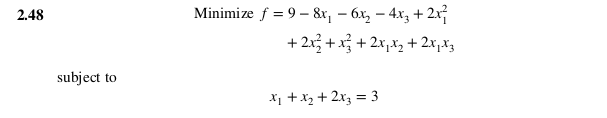

In [3]:
import sympy as sp

# Define the variables
x1, x2, x3, λ, z = sp.symbols('x1 x2 x3 λ z')

# Define the objective function and the constraint
f = 9 - 8*x1 - 6*x2 - 4*x3 + 2*x1**2 + 2*x2**2 + x3**2 + 2*x1*x2 + 2*x1*x3
g = x1 + x2 + 2*x3 -3

# Define the Lagrange function
L = f + λ*g

# Step 1: Find stationary points by solving ∇L = 0
stationary_points = sp.solve([sp.diff(L, var) for var in (x1, x2, x3, λ)], (x1, x2, x3, λ))

# Extract values only from the stationary points and convert to floating-point numbers
stationary_values = [tuple([val.evalf() for val in stationary_points.values()])]

# Step 2: Solve the Hessian matrix to get z values
for point in stationary_values:
    x1_val, x2_val, x3_val, λ_val  = point

    # Calculate Hessian matrix
    L11 = sp.diff(L, x1, x1).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L12 = sp.diff(L, x1, x2).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L13 = sp.diff(L, x1, x3).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L21 = sp.diff(L, x2, x1).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L22 = sp.diff(L, x2, x2).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L23 = sp.diff(L, x2, x3).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L31 = sp.diff(L, x3, x1).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L32 = sp.diff(L, x3, x2).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})
    L33 = sp.diff(L, x3, x3).subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val})

    g11 = sp.diff(g, x1).subs({x1: x1_val, x2: x2_val, x3: x3_val})
    g12 = sp.diff(g, x2).subs({x1: x1_val, x2: x2_val, x3: x3_val})
    g13 = sp.diff(g, x3).subs({x1: x1_val, x2: x2_val, x3: x3_val})

    hessian_matrix = sp.Matrix([[L11-z, L12, L13, g11],
                                 [L21, L22-z, L23, g12],
                                 [L31, L32, L33-z, g13],
                                 [g11, g12, g13, 0]])

    z_values = sp.solve(hessian_matrix.det(), z)

    # Choose a λ value
    λ_value = max(z_values).evalf()  # Choose the maximum value of λ

    # Calculate f* using the obtained λ1 value
    f_star = f.subs({x1: x1_val, x2: x2_val, x3: x3_val, λ: λ_val}).evalf()

    # Print the results with 3 decimal points
    print(f"Stationary point: (x1, x2, x3, λ) = ({x1_val.evalf():.3f}, {x2_val.evalf():.3f}, {x3_val.evalf():.3f}, {λ_val.evalf():.3f}), z = {z_value.evalf():.3f}")
    print(f"f* value = {f_star.evalf():.3f}")


Stationary point: (x1, x2, x3, λ) = (1.333, 0.778, 0.444, 0.222), z = -6.400
f* value = 0.111
